# Análise de Dados SRAG/COVID-19
### Aluno: Rafael dos Santos Pereira - ADS B

###### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.


In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
low_memory=False

In [2]:
#Leitura do arquivo csv.
filename = r'C:\Users\Dossper\INFLUD-30-06-2020.csv'
df = pd.read_csv(filename, delimiter=';',
                encoding='ISO-8859-1',
                error_bad_lines=False,
                usecols=['CLASSI_FIN','SG_UF_NOT', 'SG_UF', 'EVOLUCAO','CS_SEXO','NU_IDADE_N'])

In [3]:
troca_evolução = {1:'Cura', 2:'Óbito', 9:'Ignorado'}
troca_class = {1: "SRAG por influenza", 2: "SRAG por outro vírus respiratório",
                   3: "SRAG por outro agente Etiológico, qual:", 4: "SRAG não especificado",
                   5: "COVID-19", 9: "Não informado"}

In [4]:
df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolução[x])
df.loc[(df.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 9
df['CLASSI_FIN'] = df['CLASSI_FIN'].apply(lambda x: troca_class[x])

In [5]:
df.groupby('SG_UF').size().sort_values(ascending=True).tail(10).sort_values(ascending=False)

SG_UF
SP    128109
RJ     42399
CE     23003
MG     22265
PE     18035
PR     14998
PA     14743
AM     11767
RS     11617
BA     10851
dtype: int64

In [6]:
plt.style.use("Solarize_Light2")

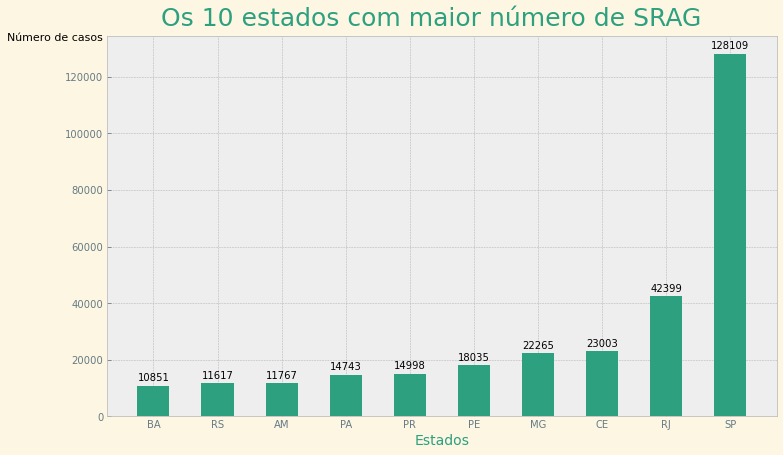

In [14]:
#10 estados com mais casos
#Estilos usados no layout do gráfico "Solarize_Light e bmh"

obito = df.groupby('SG_UF').size().sort_values().tail(10)
n_obitos = dict(obito)
dados = {}

estados = list(n_obitos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'obito': []}
for estado in estados:
    if(estado in n_obitos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['obito'].append(n_obitos[estado])
     
        
labels = dados_grafico['estados']
obito = dados_grafico['obito']


x = np.arange(len(labels)) 
width = 0.50

fig, ax = plt.subplots(1,1,figsize=(12,7))
rects2 = ax.bar(x, obito, width, label='Óbitos', color = '#2CA07F')

plt.xlabel('Estados',color ='#2CA07F', fontsize=14, ha='center')
plt.figtext(.065,.87,'Número de casos',color ='k', fontsize=11, ha='center')
plt.figtext(.5,.9,'Os 10 estados com maior número de SRAG',color ='#2CA07F', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

In [8]:
#Número de óbitos nos 10 estados mais afetados
df.query('EVOLUCAO == "Óbito"').groupby('SG_UF').size().sort_values(ascending=True).tail(10).sort_values(ascending=False)

SG_UF
SP    25852
RJ    13116
CE     7601
PA     5743
PE     5022
AM     4161
MG     3228
BA     2927
MA     2441
PR     2216
dtype: int64

In [9]:
#Número de pessoas curadas nos 10 estados mais afetados
df.query('EVOLUCAO == "Cura"').groupby('SG_UF').size().sort_values(ascending=True).tail(10).sort_values(ascending=False)

SG_UF
SP    60595
RJ    11430
MG     9356
PR     8318
RS     6962
CE     6832
PA     4852
AM     3873
MT     3677
PE     3252
dtype: int64

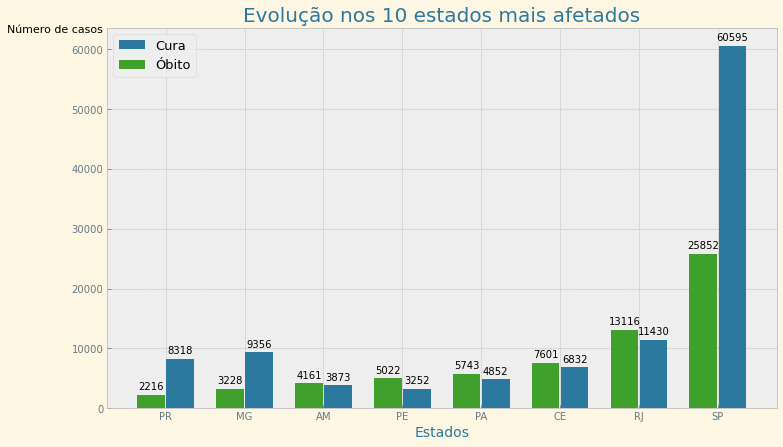

In [10]:
#Comparação entre número de pessoas Curadas e número de Óbitos nos estados com mais casos de SRAG
obito = df.query('EVOLUCAO == "Óbito"').groupby('SG_UF').size().sort_values().tail(10)
cura = df.query('EVOLUCAO == "Cura"').groupby('SG_UF').size().sort_values().tail(10)
n_obitos = dict(obito)
n_curas = dict(cura)
dados = {}

estados = list(n_obitos.keys()) + list(n_curas.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'obito': [], 'cura': []}
for estado in estados:
    if(estado in n_obitos.keys() and estado in n_curas.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['obito'].append(n_obitos[estado])
        dados_grafico['cura'].append(n_curas[estado])
        
labels = dados_grafico['estados']
obito = dados_grafico['obito']
cura = dados_grafico['cura']

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(12,7))
rects1 = ax.bar(x + width/1.90, cura, width, label='Cura', color='#2C79A0')
rects2 = ax.bar(x - width/1.90, obito, width, label='Óbito', color = '#3FA02C')

plt.xlabel('Estados',color ='#2C79A0', fontsize=14, ha='center')
plt.figtext(.065,.87,'Número de casos',color ='k', fontsize=11, ha='center')
ax.set_title('Evolução nos 10 estados mais afetados', fontsize=20,color ='#2C79A0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)
plt.show()

In [11]:
#Índice de infectados com COVID-19
df.query('CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().sort_values(ascending=True).tail(10).sort_values(ascending=False)

SG_UF
SP    58659
RJ    22894
CE    11176
PA     9648
PE     7797
AM     6846
MT     5700
BA     4725
MG     4195
RS     3547
dtype: int64

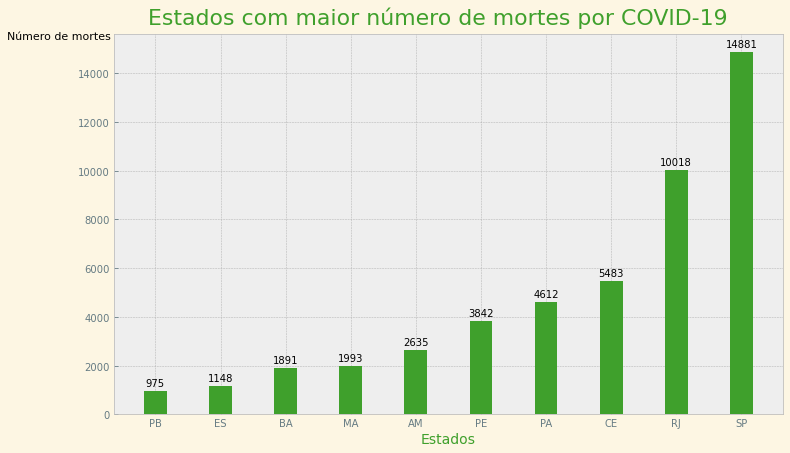

In [12]:
#10 estados com maior número de mortes por COVID-19
obito = df.query('CLASSI_FIN == "COVID-19" and EVOLUCAO == "Óbito"').groupby('SG_UF').size().sort_values().tail(10)
n_obitos = dict(obito)
dados = {}

estados = list(n_obitos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'obito': []}
for estado in estados:
    if(estado in n_obitos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['obito'].append(n_obitos[estado])
     
        
labels = dados_grafico['estados']
obito = dados_grafico['obito']


x = np.arange(len(labels)) 
width = 0.35
fig, ax = plt.subplots(1,1,figsize=(12,7))
rects2 = ax.bar(x, obito, width, color = '#3FA02C')
plt.xlabel('Estados',color ='#3FA02C',fontsize=14, ha='center')
plt.figtext(.062,.87,'Número de mortes',color ='k', fontsize=11, ha='center')
plt.figtext(.5,.9,'Estados com maior número de mortes por COVID-19',color ='#3FA02C', fontsize=22, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

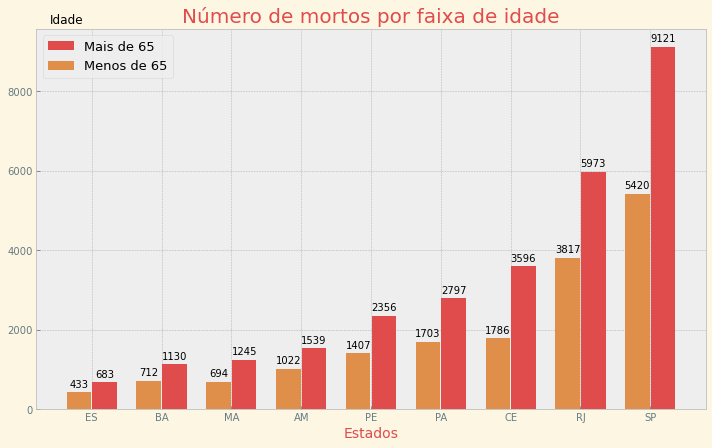

In [13]:
#Número de mortos comparando a idade tendo mais de 65 anos e menos de 65 anos.
idosa = df.query('CLASSI_FIN == "COVID-19" and EVOLUCAO == "Óbito" and NU_IDADE_N > 65').groupby('SG_UF').size().sort_values().tail(10)
idade = df.query('CLASSI_FIN == "COVID-19" and EVOLUCAO == "Óbito" and NU_IDADE_N < 65').groupby('SG_UF').size().sort_values().tail(10)

n_idosa = dict(idosa)
n_idade = dict(idade)
dados = {}

estados = list(n_idosa.keys()) + list(n_idade.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'idosa': [], 'idade': []}
for estado in estados:
    if(estado in n_idosa.keys() and estado in n_idade.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['idosa'].append(n_idosa[estado])
        dados_grafico['idade'].append(n_idade[estado])
        
labels = dados_grafico['estados']
idosa = dados_grafico['idosa']
idade = dados_grafico['idade']

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(12,7))
rects1 = ax.bar(x + width/1.90, idosa, width, label='Mais de 65', color = '#E04B4B')
rects2 = ax.bar(x - width/1.90, idade, width, label='Menos de 65', color='#E08F4B')


plt.xlabel('Estados',color ='#E04B4B', fontsize=14, ha='center')
ax.set_title('Número de mortos por faixa de idade', fontsize=20,color ='#E04B4B')
plt.figtext(.16,.89,'Idade',color ='k', fontsize=12, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)
plt.show()